# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import to_categorical
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label), (x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = to_categorical(y_train_label)
y_Test_OneHot = to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型

In [8]:
model = Sequential()

In [9]:
# First layer
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
# Intermediate layers
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))

In [11]:
# Output
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.2578 - accuracy: 0.9249 - val_loss: 0.1141 - val_accuracy: 0.9653
Epoch 2/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.0976 - accuracy: 0.9693 - val_loss: 0.0950 - val_accuracy: 0.9721
Epoch 3/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.0664 - accuracy: 0.9784 - val_loss: 0.1045 - val_accuracy: 0.9697
Epoch 4/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0847 - val_accuracy: 0.9768
Epoch 5/10
48000/48000 [==============================] - 6s 130us/step - loss: 0.0369 - accuracy: 0.9881 - val_loss: 0.0970 - val_accuracy: 0.9737
Epoch 6/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.0975 - val_accuracy: 0.9757
Epoch 7/10
48000/48000 [==============================] - 6s 1

# 以圖形顯示訓練過程

In [14]:
# 改版過了，只能使用 'accuracy' / 'val_accuracy' 而非 'acc' / 'val_acc'，
train_history.history

{'val_loss': [0.11408168743550777,
  0.09495349223632366,
  0.10451164388974818,
  0.08470441575573447,
  0.09704781805196157,
  0.09754727700179985,
  0.11437912014420484,
  0.10385727630114343,
  0.10570468115496381,
  0.11938854314882943],
 'val_accuracy': [0.9652500152587891,
  0.972083330154419,
  0.9697499871253967,
  0.9767500162124634,
  0.9736666679382324,
  0.9756666421890259,
  0.9736666679382324,
  0.9779999852180481,
  0.9759166836738586,
  0.9755833148956299],
 'loss': [0.2578240379594887,
  0.09763057310739533,
  0.06639329763245769,
  0.04784920797640613,
  0.03692818942557399,
  0.028545017491376105,
  0.023442619148794013,
  0.02144162853061789,
  0.016655928346999038,
  0.018751946157826296],
 'accuracy': [0.9248958,
  0.96925,
  0.9784375,
  0.98497915,
  0.9880625,
  0.990125,
  0.9928333,
  0.993,
  0.9948125,
  0.99383336]}

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

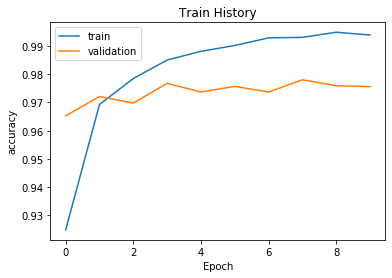

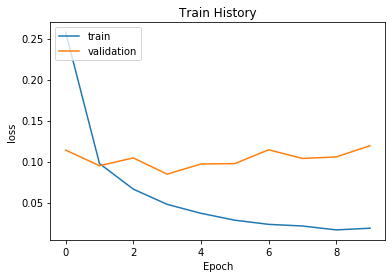

In [17]:
# unit = 128
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

### 觀察到的差異：
當新增一層 unit = 128，因為多了一層神經層，模型變複雜一點，所以收斂需要多一點時間，多一些cycle，依照本來的設定可以觀察到 validation accuracy/loss 有比原先更大的波動。

當新增一層 unit = 256，波動比 128 更明顯。

# 評估模型準確率

In [18]:
# unit = 128
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 36us/step

accuracy= 0.9758999943733215


# 圖形存放區

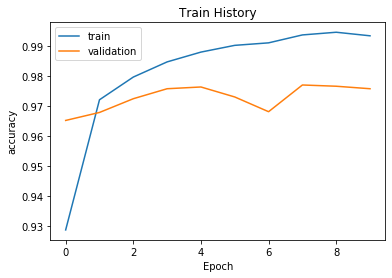

In [26]:
# unit = 256
show_train_history(train_history,'accuracy','val_accuracy')

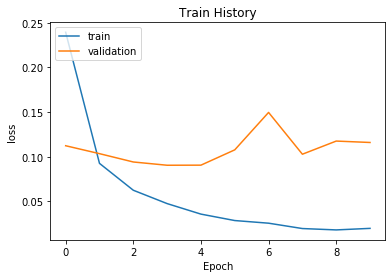

In [27]:
# unit = 256
show_train_history(train_history,'loss','val_loss')

In [28]:
# unit = 256
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 41us/step

accuracy= 0.9789000153541565
